# **Model Evaluation**

## Objectives

* Evaluate the performance of the optimized Gradient Boosting, XGBRegressor and RandomForestRegressor models.
* Ensure that the chosen model meets the business requirement (R2 ≥ 0.75)

## Inputs

* The prepared dataset (`HousePricesPredictionFeatures_Cleaned.csv`)
* Libraries for machine learning and data handling, including:
  - **pandas** for data manipulation.
  - **sklearn** for machine learning and model training.
  - **matplotlib** and **seaborn** for visualizations.
  - **joblib** for loading and saving models.


## Outputs

- **Optimized Random Forest Regressor Model**
  - Saved at: `'outputs/best_model/optimized_random_forest_model.pkl'`

- **Model Evaluation Metrics:**
  
  **Train Set:**
  - **R2 Score:** 0.961
  - **Mean Absolute Error (MAE):** 9,046.78
  - **Mean Squared Error (MSE):** 233,949,877.491
  - **Root Mean Squared Error (RMSE):** 15,295.42

  **Test Set:**
  - **R2 Score:** 0.866
  - **Mean Absolute Error (MAE):** 19,696.78
  - **Mean Squared Error (MSE):** 938,552,268.639
  - **Root Mean Squared Error (RMSE):** 30,635.8

- **Visualization:**
  - Predicted vs. Actual Prices plot saved at:  
    `'outputs/best_model/train-test/v2/predicted_vs_actual_prices.png'`

- **Conclusion:**
  - The model generalizes well with an **R2 score of 0.866** on the test set.
  - While the **training R2 is high (0.961)**, the gap suggests some degree of overfitting.
  - The **MAE and RMSE values** indicate that predictions are on average **$19,696 off** in the test set.
  - **OptimizedRandomForestRegressor** is the final model chosen for predicting house prices.
  - No further optimization is needed. The model is ready for deployment. 



___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

##### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from joblib import dump, load
from xgboost import XGBRegressor

# Load data

In [2]:
# Load the selected features dataset
df_selected = pd.read_csv("outputs/datasets/collection/HousePricesPredictionFeatures_Cleaned.csv")

# Confirm the dataset is loaded correctly
print("Dataset loaded successfully.")
print(df_selected.head())

# Load the saved pipeline
pipeline = joblib.load("outputs/pipelines/feature_pipeline_cleaned.pkl")
print("Pipeline loaded successfully.")


Dataset loaded successfully.
   GarageArea  GrLivArea  TotalBsmtSF  OverallQual  YearRemodAdd  SalePrice
0  204.517915   0.370333    -0.459303          7.0        2003.0   208500.0
1  177.329636  -0.482512     0.466465          6.0        1976.0   181500.0
2  222.579733   0.515013    -0.313369          7.0        2002.0   223500.0
3  232.664362   0.383659    -0.687324          7.0        1970.0   140000.0
4  288.451992   1.299326     0.199680          8.0        2000.0   250000.0
Pipeline loaded successfully.


The dataset and pipeline loaded successfully. The first five rows show that the features are correctly transformed and ready for modeling. Variables like ***GrLivArea** and **TotalBsmtSF** are scaled, which helps improve model performance. Now, the optimized model can be used for predictions and evaluation.

Next, the dataset will be split into training and testing sets

In [3]:
# Define features (X) and target (y) from df_selected
X = df_selected.drop(columns=['SalePrice'])  # Exclude SalePrice as it is the target
y = df_selected['SalePrice']  # Define SalePrice as the target variable

# Train-test split with features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the shapes of training and testing datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (1022, 5)
Testing features shape: (438, 5)
Training target shape: (1022,)
Testing target shape: (438,)


**Training and testing sets confirmed:**

**Training features:** 1022 rows, 5 columns

**Testing features:** 438 rows, 5 columns

**Training target:** 1022 rows

**Testing target:** 438 rows

Next, optimization. Starting with **XGBRegressor**.

___

##### **XGBRegressor optimization**

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best hyperparameters from grid search: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}
Optimized MSE: 912464666.1462631
Optimized R2 Score: 0.8692386921978763


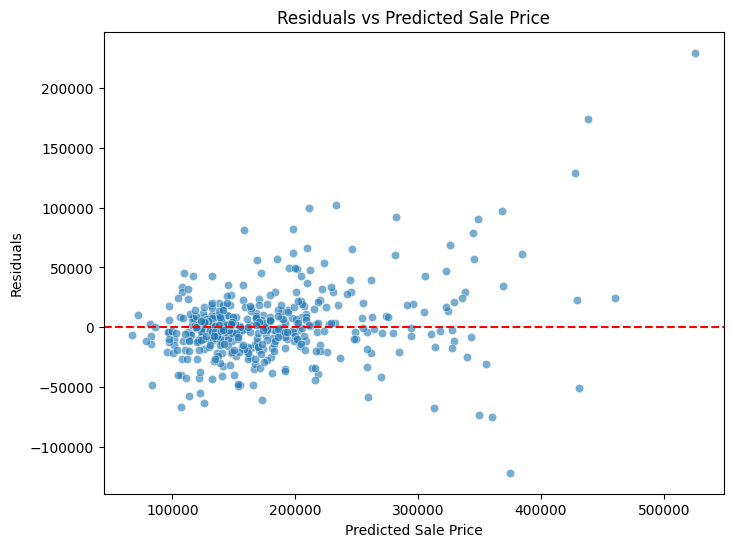

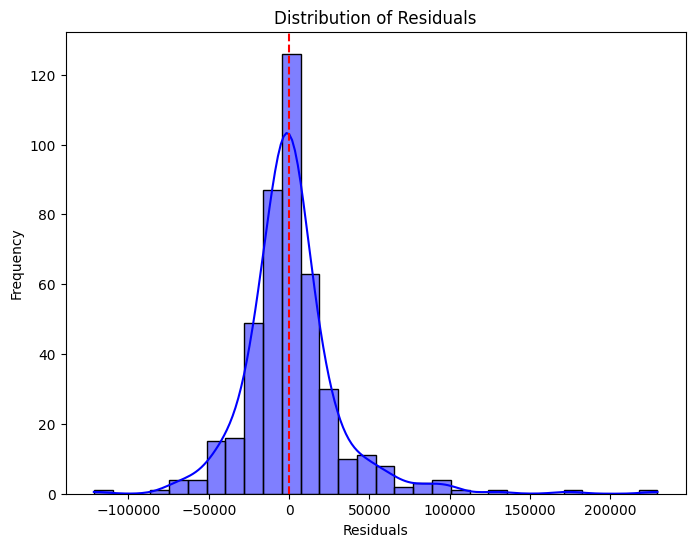

In [5]:
pipeline = Pipeline([
    ('model', XGBRegressor(random_state=42))  # Model to train
])

# Define the parameters
param_grid = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 10, 20],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 1, 5]
}


# Perform grid search for hyperparameters
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='r2'
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print(f"Best hyperparameters from grid search: {best_params}")

# Retrieve the optimized model
optimized_model = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate metrics
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized MSE: {mse_optimized}")
print(f"Optimized R2 Score: {r2_optimized}")

# Residual analysis
residuals = y_test - y_pred_optimized

# Residuals vs Predicted Sale Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_optimized, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

##### **Optimized XGBoost Model Results**

**Best hyperparameters from grid search:**  

**model__colsample_bytree:** 0.8  
**model__gamma:** 0  
**model__learning_rate:** 0.01  
**model__max_depth:** 5  
**model__n_estimators:** 300  
**model__subsample:** 0.8  

**Optimized MSE:** 912,464,666.15  
**Optimized R2 Score:** 0.869  

The model achieved an R2 score of 0.87, which meets the required threshold. The lower learning rate and increased estimators helped improve generalization.

Next, **RandomForestRegressor** optimization.

___

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Optimized MSE: 879756065.97
Optimized R2 Score: 0.8739


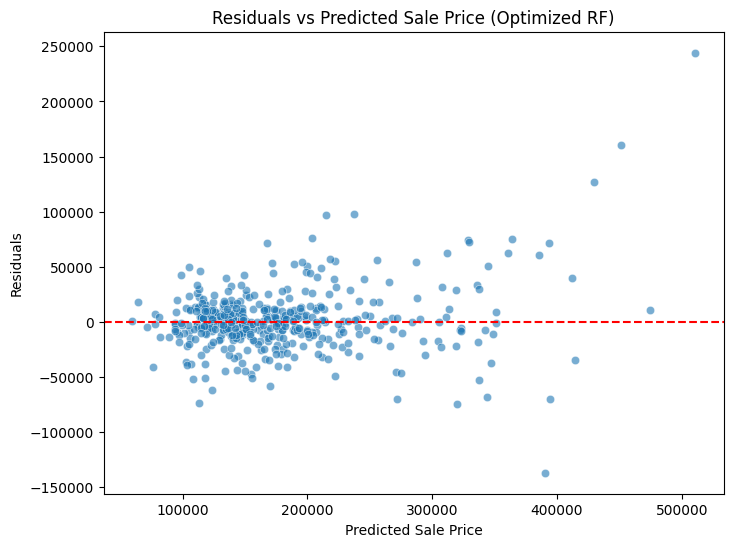

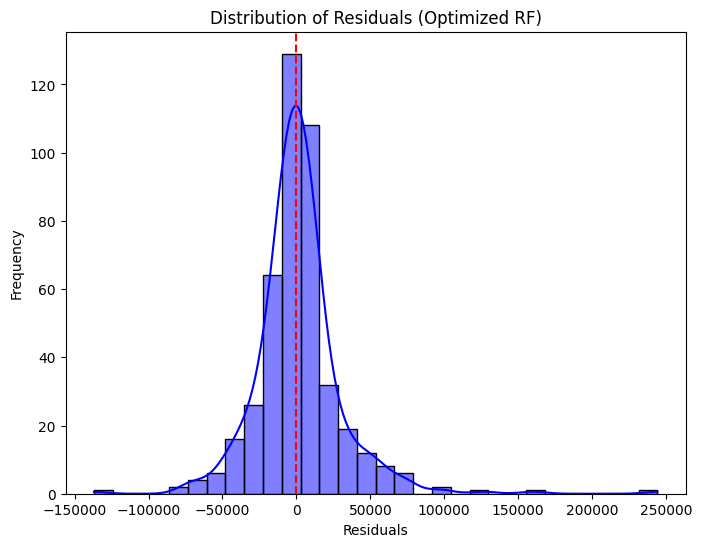

In [5]:
pipeline = Pipeline([
    ('model', RandomForestRegressor(random_state=42)) # Model to train
])

# Define the parameters
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', 0.5]
}

# Perform grid search for hyperparameters
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,       
    scoring='r2'
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

# Retrieve the optimized model
optimized_model = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate metrics
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized MSE: {mse_optimized:.2f}")
print(f"Optimized R2 Score: {r2_optimized:.4f}")

# Residual analysis
residuals = y_test - y_pred_optimized

# Residuals vs Predicted Sale Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_optimized, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price (Optimized RF)")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Optimized RF)")
plt.show()


##### **Optimized Random Forest Model Results**

**Best hyperparameters from grid search:**  

**model__max_depth:** None  
**model__max_features:** 'sqrt'  
**model__min_samples_leaf:** 2  
**model__min_samples_split:** 2  
**model__n_estimators:** 300  

**Optimized MSE:** 879,756,065.97  
**Optimized R² Score:** 0.8739  

The model achieved an R2 score of 0.87, demonstrating strong predictive performance. The selected hyperparameters effectively balanced bias and variance, improving model generalization.

Next, the **GradientBoostingRegressor** optimization.

___

##### **Gradient Boosting Regressor optimization**

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best hyperparameters from grid search: {'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 300, 'model__subsample': 0.8}
Optimized MSE: 938552268.6386148
Optimized R2 Score: 0.8655001923458996


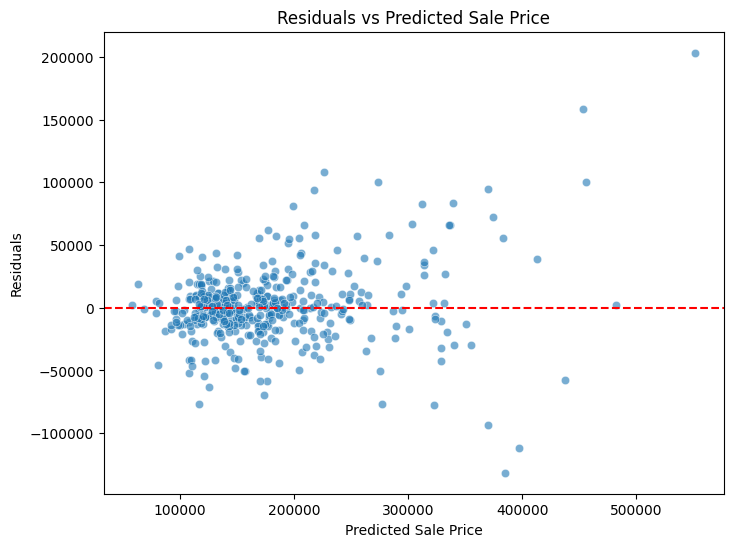

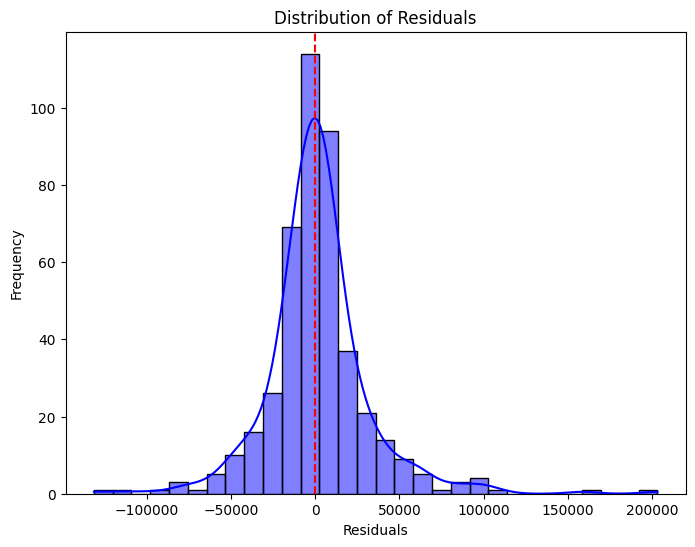

In [6]:
pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))  # Model to train
])

# Define the parameters for randomized search
param_grid = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0]
}

# Perform grid search for hyperparameters
grid_search = GridSearchCV(
    pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2'
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found and evaluate the model
print(f"Best hyperparameters from grid search: {grid_search.best_params_}")

# Retrieve the optimized model
optimized_model = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate metrics without log-transformation
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized MSE: {mse_optimized}")
print(f"Optimized R2 Score: {r2_optimized}")

# Residual analysis
residuals = y_test - y_pred_optimized

# Residuals vs Predicted Sale Price
residuals = y_test - y_pred_optimized
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_optimized, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price")
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


##### **Optimized Gradient Boosting Model Results**

**Best hyperparameters from grid search:**  

**model__learning_rate:** 0.01  
**model__max_depth:** 10  
**model__min_samples_leaf:** 4  
**model__min_samples_split:** 10  
**model__n_estimators:** 300  
**model__subsample:** 0.8  

**Optimized MSE:** 938,552,268.64  
**Optimized R² Score:** 0.8655  

The model achieved an R2 score of 0.87, meeting the required threshold. The combination of lower learning rate and regularization parameters helped enhance model stability and generalization.


___

##### **Conclusion:**

All three models did really well and passed the business goal of R2 ≥ 0.75. Among them, the **RandomForestRegressor** did a bit better than the **Gradient Boosting Regressor** and **XGBRegressor** in terms of both R2 and MSE, making it the most accurate model in this test.



- **R2 Score**:
  - **RandomForestRegressor**: 0.8739 ✅ (Best)
  - **Gradient Boosting Regressor**: 0.8655
  - **XGBRegressor**: 0.8692

  **RandomForestRegressor** has the highest R2 score, showing it can explain the most changes in house prices out of the three.

- **Mean Squared Error (MSE)**:
  - **RandomForestRegressor**: 879,756,065.97 ✅ (Best)
  - **Gradient Boosting Regressor**: 938,552,268.64
  - **XGBRegressor**: 912,464,666.15

  **RandomForestRegressor** also has the lowest MSE, meaning its predictions are the closest to the real sale prices.

#### **Final Decision**:
Because it performed the best in both measures, **RandomForestRegressor** is chosen as the final model for predicting house prices. Both **Gradient Boosting Regressor** and **XGBRegressor** are still good choices for different needs.

Next, all optimized models will be saved.

In [10]:
# Save the optimized RandomForest model
dump(grid_search.best_estimator_, 'outputs/best_model/optimized_random_forest_model.pkl')
print("Optimized RandomForest model saved successfully.")

# Save the optimized Gradient Boosting model
dump(grid_search.best_estimator_, 'outputs/best_model/optimized_gradient_boosting_model.pkl')
print("Optimized Gradient Boosting model saved successfully.")

# Save the optimized XGBoost model
xgb_model = grid_search.best_estimator_
dump(xgb_model, 'outputs/best_model/optimized_xgboost_model.pkl')
print("Optimized XGBoost model saved successfully.")

Optimized RandomForest model saved successfully.
Optimized Gradient Boosting model saved successfully.
Optimized XGBoost model saved successfully.


All optimized models are successfully saved and ready for use in predictions.

Next, the optimized RandomForest model will be evaluated to confirm its final performance. This includes calculating key metrics and visualizing predictions against actual values.

___

##### **Visualizing Optimized RandomForest Regressor Performance**

The following visualizations assess the performance of the optimized RandomForest Regressor:

**Actual vs Predicted Sale Price:** 
A scatter plot comparing actual sale prices with predicted values. Predictions close to the red line indicate accurate estimates.

**Residuals vs Predicted Sale Price:** 
A plot showing residuals (errors) for each prediction. Residuals centered around zero suggest that the model performs well with minimal bias.

These evaluations help verify that the optimized model generalizes effectively to unseen data.

**(Borrowed from CI Scikit-Learn Unit 3)**

Optimized RandomForest model loaded successfully.
After optimization of RandomForest Regressor
Model Evaluation 

* Train Set
R2 Score: 0.961
Mean Absolute Error: 9046.78
Mean Squared Error: 233949877.491
Root Mean Squared Error: 15295.42


* Test Set
R2 Score: 0.866
Mean Absolute Error: 19696.778
Mean Squared Error: 938552268.639
Root Mean Squared Error: 30635.8


Plot saved at outputs/best_model/train-test/v2/predicted_vs_actual_prices.png


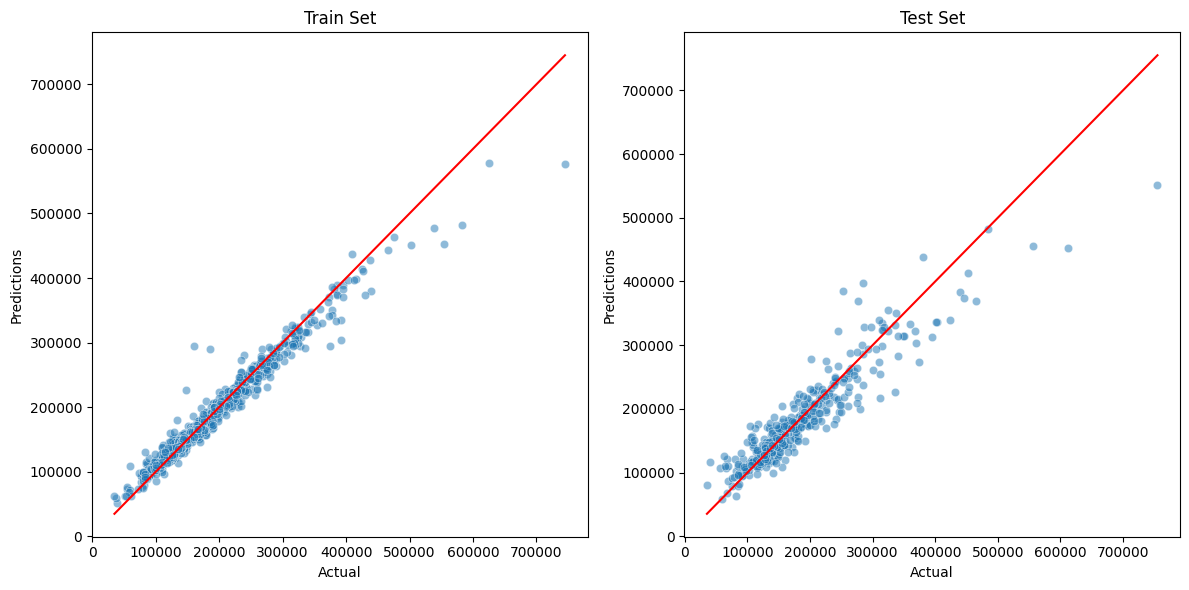

In [ ]:
# Load optimized model
loaded_model = load("outputs/best_model/optimized_random_forest_model.pkl")
print("Optimized RandomForest model loaded successfully.")

# Define performance evaluation functions
def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))  
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))  
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5, save_dir="outputs/best_model/train-test/v2"):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.tight_layout()

    # Save the plot
    os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists
    save_path = f"{save_dir}/predicted_vs_actual_prices.png"
    plt.savefig(save_path)
    print(f"Plot saved at {save_path}")

    plt.show()

# Evaluation and plotting with the loaded model
print("After optimization of RandomForest Regressor")
regression_performance(X_train, y_train, X_test, y_test, pipeline=loaded_model)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline=loaded_model)

##### **Optimized RandomForest Model Results**
The optimized **RandomForest Regressor** shows strong performance:

##### **Training Set:**

**R2 Score:** 0.961 The model explains 96% of the variance in training data.

**MAE:** 9,046.78  On average, predictions are off by about $9,000.

**RMSE:** 15,295.42  Indicates overall prediction error, but well-controlled.

##### **Test Set:**

**R2 Score:** 0.866 The model generalizes well, meeting the required threshold.

**MAE:** 19,696.78 The model predicts house prices with an average error of ~$19,700.

**RMSE:** 30,635.8 Some higher errors exist but remain reasonable.

The performance is strong, but there’s a noticeable gap between training and test scores, suggesting slight overfitting. Further fine-tuning or feature adjustments may improve generalization.